# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [29]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[0,0,1,1]]).T
print(y.shape)

(4, 1)


In [39]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(11)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1
# define syn1

iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）
syn1_history = [syn1]
syn0_history = [syn0]

print(syn0, syn1)

[[-0.63946062 -0.96104952 -0.07356295  0.44986786]
 [-0.15959279 -0.0291458  -0.97443837 -0.02525679]
 [ 0.8836133   0.70159018  0.45992894 -0.78252786]] [[ 0.78780834]
 [ 0.71430849]
 [-0.66982676]
 [ 0.26466803]]


神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [44]:
error_history = np.zeros(shape=(10000))
for iter in range(10000):
    # forward propagation
    
    l0 = X
    l1_input = l0.dot(syn0)
    l1_output = nonlin(l1_input)
    outputlayer_input = l1_output.dot(syn1)
    output_val = nonlin(outputlayer_input)

    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
 
    # how much did we miss?
    loss = y - output_val
    error = 1/2*(np.sum(y - output_val)**2)
    error_history[iter] = error
    
    l2_error = loss * nonlin(output_val, deriv=True)
    
    l1_error = loss * nonlin(l1_output, deriv=True)
    
    dloss_dactivate = syn1.T.dot(l2_error)
    
    dloss_dz = dloss_dactivate*l1_error

    
    # update weights
    syn0 -= np.dot(l0.T,dloss_dz)
    syn1 -= np.dot(l1_output.T,l2_error)
     # syn1 update weights
    
print("Output After Training:")
print("\n\n")
print(l1, l2)

Output After Training:



[[0.00966954 0.00966915]
 [0.00786481 0.007866  ]
 [0.99358988 0.99358867]
 [0.99211629 0.99211633]] [[0.4999999 ]
 [0.5000001 ]
 [0.49999426]
 [0.49999441]]


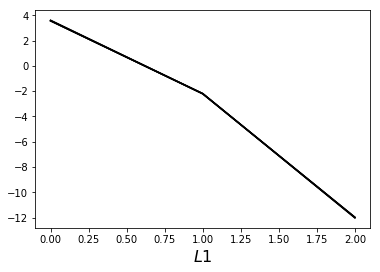

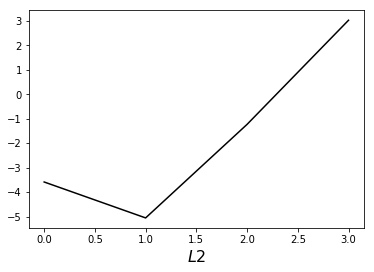

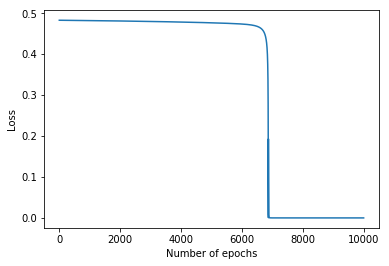

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

plt.plot(syn1_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()


plt.plot(range(10000), error_history)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()